In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
admission = pd.read_csv("admissions.csv")

In [3]:
admission.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


In [4]:
admission.shape

(644, 3)

In [22]:
admission["admit"].value_counts()

0    400
1    244
Name: admit, dtype: int64

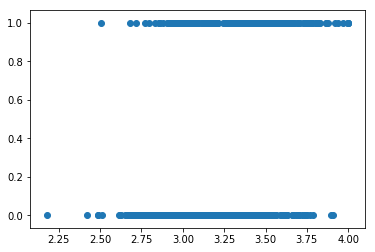

In [5]:
plt.scatter(admission["gpa"],admission["admit"])

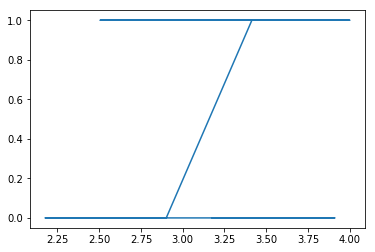

In [6]:
plt.plot(admission["gpa"],admission["admit"])

In [7]:
admission["admit"].unique()

array([0, 1], dtype=int64)

y = $e^x$/(1+$e^x$)

In [8]:
def logistic(x):
    numinator = np.exp(x)
    denominator = 1 + np.exp(x)
    y = numinator/denominator
    return y

In [9]:
x = np.linspace(-6,6,100)
y = logistic(x)

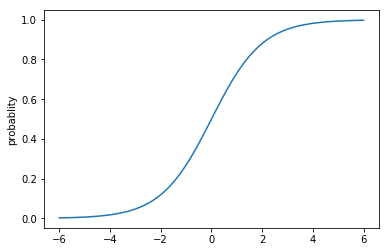

In [10]:
plt.plot(x,y)
plt.ylabel("probablity")
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(admission[["gpa"]],admission["admit"])
prob = model.predict_proba(admission[["gpa"]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
admit = prob[:,1]

In [13]:
predict = model.predict(admission[["gpa"]])
predict[:5]

array([0, 0, 0, 0, 0], dtype=int64)

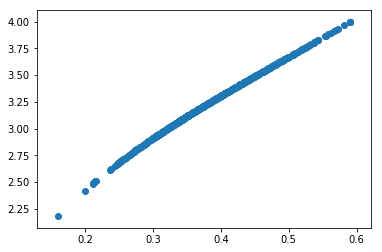

In [14]:
plt.scatter(admit,admission["gpa"])

In [15]:
admission["prediction"] = predict

In [16]:
admission.head()

,admit,gpa,gre,prediction
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


In [17]:
correct_label = admission["admit"] == admission["prediction"]
tot_corr = correct_label.sum()
tot_corr

416

In [18]:
accuracy = tot_corr/admission.shape[0]
accuracy

0.6459627329192547

* TPR - sensitivity
* TNR - specificity

* TPR = TP/(TP+FN)
* TNR = TN/(TN+FP)

In [19]:
tp = len(admission[(admission["admit"] ==1) & (admission["prediction"]== 1)])
tn = len(admission[(admission["admit"] ==0) & (admission["prediction"]== 0)])

In [20]:
fn = len(admission[(admission["admit"] ==1) & (admission["prediction"]== 0)])
fp = len(admission[(admission["admit"] ==0) & (admission["prediction"]== 1)])

In [21]:
tpr = tp/(tp+fn)
tnr = tn/(tn+fp)

print(tpr*100)
print()
print(tnr*100)

12.704918032786885

96.25
